In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
d = 2.0      # Distance between || lines
l = 1.0     # Needle length (l <= d)
N = 10000    # Number of needle drops

In [ ]:
# Generate random needle positions and directions
x = np.random.uniform(0, d/2, N)  # Distance to nearest line

# Generate random directions (w/otrigonometric functions)
u, v = np.random.uniform(-1, 1, (2, N))
norm = np.sqrt(u**2 + v**2)
b = np.abs(v / norm)  # |sin(theta)| equivalent

# Check crossing condition: (l/2)*sin(theta) >= x
crosses = (l/2) * b >= x
cumulative_crosses = np.cumsum(crosses)

# Estimate π at each step
n = np.arange(1, N+1)
pi_estimate = (2 * l * n) / (d * cumulative_crosses)
pi_estimate[cumulative_crosses == 0] = 0  # Avoid division by zero


/tmp/ipython-input-13-62407523.py:15: RuntimeWarning: divide by zero encountered in divide
  pi_estimate = (2 * l * n) / (d * cumulative_crosses)


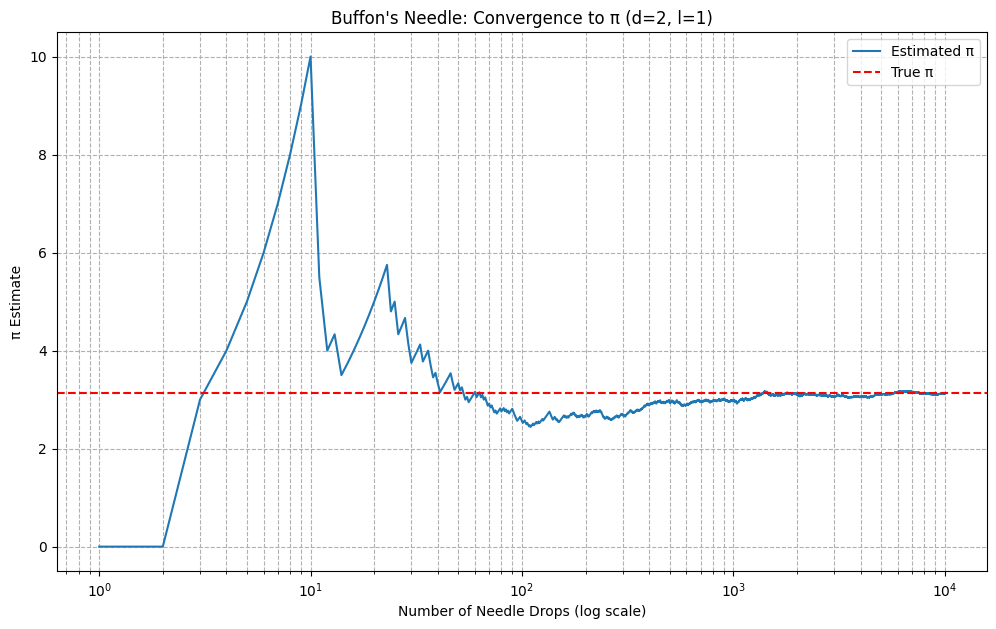

Final π estimate after 10000 drops: 3.11818
Absolute error: 0.02341


In [ ]:

# Plot convergence
plt.figure(figsize=(12, 7))
plt.plot(n, pi_estimate, label='Estimated π')
plt.axhline(y=np.pi, color='r', linestyle='--', label='True π')
plt.xscale('log')
plt.xlabel('Number of Needle Drops (log scale)')
plt.ylabel('π Estimate')
plt.title('Buffon\'s Needle: Convergence to π (d=2, l=1)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Final estimate
final_pi = (2 * l * N) / (d * cumulative_crosses[-1])
print(f"Final π estimate after {N} drops: {final_pi:.5f}")
print(f"Absolute error: {abs(final_pi - np.pi):.5f}")